<a href="https://colab.research.google.com/github/adreamstar/O-Reilly-ProSeries/blob/master/First_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##IMPORT PACKAGES

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [0]:
##IMPORT DATA AND VIEW THE FIRST 3 ROWS OF ALL COLUMNS

In [8]:
data = pd.read_csv ('/content/Edited Loan Data.csv', low_memory=False)
data.head(3)  

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000,12000,12000,60 months,14.49,282.28,C,C4,1:01,4 years,OWN,32652.0,Source Verified,Jul-16,Current,n,NaN,NaN,other,Other,286xx,NC,19.59,0,Jan-92,0,NaN,89.0,6,1,1391,37.6,22,w,6871.68,6871.68,8731.36,8731.36,...,1,0,32959,4342,2700,29259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000,60 months,12.61,563.85,C,C1,1,1 year,MORTGAGE,75000.0,Not Verified,Jun-18,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,011xx,MA,26.82,0,Nov-02,1,NaN,98.0,17,1,34410,51.1,31,w,22500.37,22500.37,4493.29,4493.29,...,1,0,243117,55063,30800,44736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,40000,40000,40000,60 months,13.06,911.36,C,C1,1,7 years,MORTGAGE,93000.0,Source Verified,May-18,Current,n,NaN,NaN,home_improvement,Home improvement,117xx,NY,18.00,0,Nov-03,0,NaN,NaN,13,0,2289,8.8,23,w,35524.44,35524.44,8173.22,8173.22,...,0,0,286540,72469,5400,77690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
##DATA CLEANING

##DISPLAY THE COLUMN NAME AND A COUNT OF THE EMPTY FIELDS 

In [10]:
data_null = pd.DataFrame({'Count': data.isnull().sum()}) 
data_null[data_null['Count']>0]

,Count
id,5499
member_id,5499
emp_length,3
url,5499
desc,5498
title,97
mths_since_last_delinq,2788
mths_since_last_record,4622
revol_util,4
last_pymnt_d,5


In [0]:
##CONSIDERING WE ARE WORKING WITH 5499 ROWS OF DATA, COLUMNS WITH MORE THAN HALF NULL VALUES AREN'T NECESSARY FOR OUR ANALYSIS.
##HERE WE DROP ANY COLUMNS WHERE 50% OR MORE NULL VALUES

In [12]:
data1 = data.dropna(axis=1, thresh=int(0.50 *len (data)))
data1.head (3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,12000,12000,12000,60 months,14.49,282.28,C,C4,1:01,4 years,OWN,32652.0,Source Verified,Jul-16,Current,n,other,Other,286xx,NC,19.59,0,Jan-92,0,6,1,1391,37.6,22,w,6871.68,6871.68,8731.36,8731.36,5128.32,3603.04,0.0,0.0,0.0,Feb-19,...,2.0,2.0,4,868,1562.0,42.1,0,0,139.0,294,7,7,0,7.0,7.0,0,2,3,3,7,10,5,12,3,6,0.0,0,0,3,100.0,66.7,1,0,32959,4342,2700,29259,N,Cash,N
1,25000,25000,25000,60 months,12.61,563.85,C,C1,1,1 year,MORTGAGE,75000.0,Not Verified,Jun-18,Current,n,debt_consolidation,Debt consolidation,011xx,MA,26.82,0,Nov-02,1,17,1,34410,51.1,31,w,22500.37,22500.37,4493.29,4493.29,2499.63,1993.66,0.0,0.0,0.0,Feb-19,...,5.0,1.0,5,10340,18032.0,41.5,0,0,186.0,88,6,4,2,15.0,4.0,0,5,8,7,7,15,12,14,8,17,0.0,0,0,3,100.0,14.3,1,0,243117,55063,30800,44736,N,Cash,N
2,40000,40000,40000,60 months,13.06,911.36,C,C1,1,7 years,MORTGAGE,93000.0,Source Verified,May-18,Current,n,home_improvement,Home improvement,117xx,NY,18.00,0,Nov-03,0,13,0,2289,8.8,23,w,35524.44,35524.44,8173.22,8173.22,4475.56,3697.66,0.0,0.0,0.0,Feb-19,...,1.0,0.0,1,22102,5400.0,0.0,0,0,138.0,174,40,5,2,73.0,NaN,0,0,1,3,5,9,6,12,1,13,0.0,0,0,1,100.0,0.0,0,0,286540,72469,5400,77690,N,Cash,N


In [0]:
##43 COLUMNS WERE DROPPED IN THE PREVIOUS ACTION

In [14]:
hardship_yes = data.apply(lambda x: True if x[ 'hardship_flag' ] == 'Y' else False , axis = 1)
num_rows = len(hardship_yes[hardship_yes == True].index)
print ( 'Number of Rows in which hardship flag is Yes: ', num_rows)


Number of Rows in which hardship flag is Yes:  0


(array([  5.,  16.,  50., 141., 226., 246., 176.,  98.,  36.,   6.]),
 array([-3.43710583, -2.77514168, -2.11317754, -1.45121339, -0.78924925,
        -0.1272851 ,  0.53467904,  1.19664319,  1.85860733,  2.52057148,
         3.18253562]),
 <a list of 10 Patch objects>)

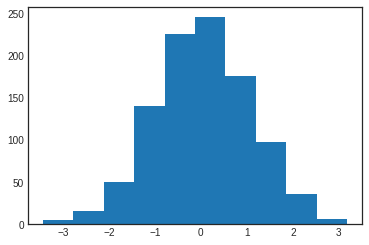

In [24]:
##Binning the data

a = np.random.randn(1000)

plt.hist(a)

            

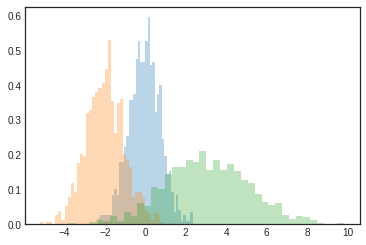

In [28]:
##Binning the data

a = np.random.normal(0,0.8,1000)
b = np.random.normal(-2,1,1000)
c = np.random.normal(3,2,1000)

kwargs = dict(histtype ='stepfilled', alpha = 0.3, density = True, bins = 40)

plt.hist(a, **kwargs)
plt.hist(b, **kwargs)
plt.hist(c, **kwargs);

            

In [29]:
counts, bin_edges = np.histogram(a, bins =5)
print(counts)

[ 39 236 469 227  29]


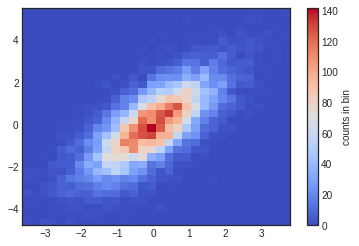

In [34]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x,y, bins=30, cmap='coolwarm')
cb = plt.colorbar()
cb.set_label('counts in bin')